### auditor data, vehicle efficiency

In [ ]:
!pip install statsmodels

In [504]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(12,8), "lines.markeredgewidth": 0.5 })
% matplotlib inline

In [505]:
# http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
# toy example

nsample = 100
x = np.linspace(0, 10, nsample)
e = np.random.normal(size=nsample)

In [506]:
X = sm.add_constant(x)
y = 5 * x + 3 + e

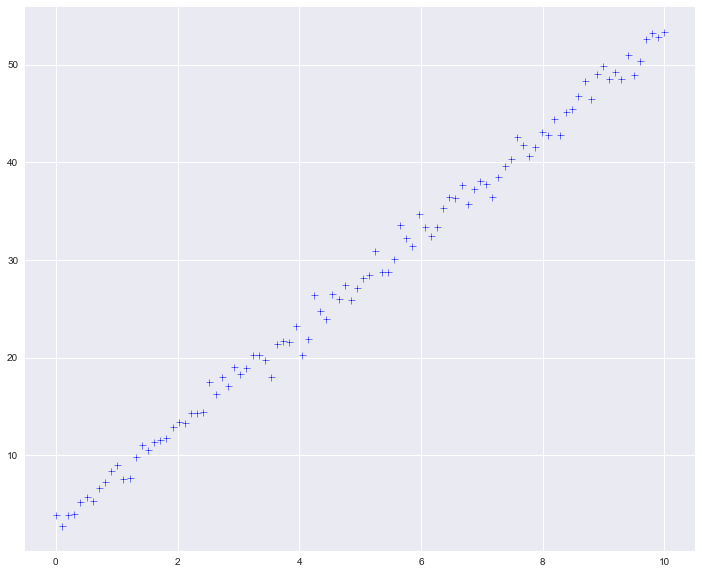

In [507]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x, y, 'b+')

In [508]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.982e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          6.53e-115
Time:                        15:56:35   Log-Likelihood:                -144.79
No. Observations:                 100   AIC:                             293.6
Df Residuals:                      98   BIC:                             298.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9294      0.206     14.192      0.0

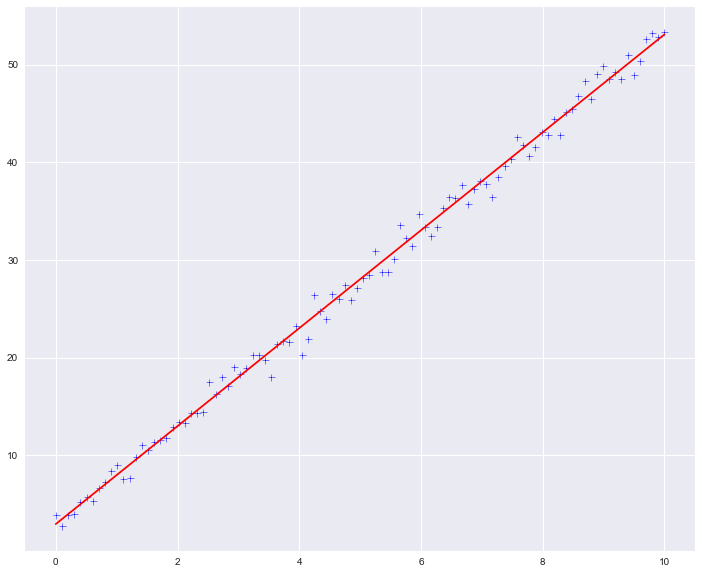

In [509]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x, y, 'b+')
ax.plot(x, results.predict(), 'r')

In [510]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/output.sqlite')


In [511]:
home_data = pd.read_sql_table("home_data", con=engine)

In [512]:
home_data.head()

,index,AirConditioning,AppraisedBuilding,AppraisedLand,Area,Bathrooms,Bedrooms,County,Fireplaces,Heat,Rooms,SalePrice,YearBuilt
0,0,True,59600.0,8100.0,2264.0,2.0,4.0,Franklin,0.0,True,10.0,0.0,1925.0
1,1,True,69800.0,4600.0,1835.0,1.5,4.0,Franklin,1.0,True,7.0,50000.0,1919.0
2,2,True,60600.0,4900.0,1656.0,1.0,3.0,Franklin,0.0,True,7.0,64000.0,1925.0
3,3,True,31200.0,5000.0,1000.0,1.0,2.0,Franklin,0.0,True,5.0,0.0,1922.0
4,4,True,63300.0,4600.0,1306.0,2.0,4.0,Franklin,0.0,True,6.0,0.0,1948.0


In [513]:
import statsmodels.api as sm

In [514]:
home_data.dtypes

index                  int64
AirConditioning         bool
AppraisedBuilding    float64
AppraisedLand        float64
Area                 float64
Bathrooms            float64
Bedrooms             float64
County                object
Fireplaces           float64
Heat                    bool
Rooms                float64
SalePrice            float64
YearBuilt            float64
dtype: object

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8), "lines.markeredgewidth": 0.5 })
%matplotlib inline

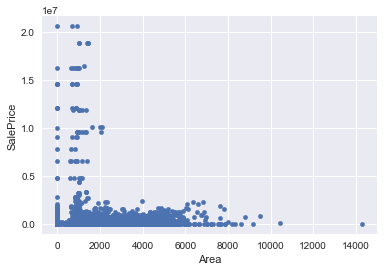

In [516]:
home_data.plot.scatter(x="Area", y="SalePrice")

In [517]:
sum(home_data.AppraisedBuilding.isna())

60

In [518]:
home_data_clean = home_data.dropna().query("SalePrice > 0 and Area > 0").copy()

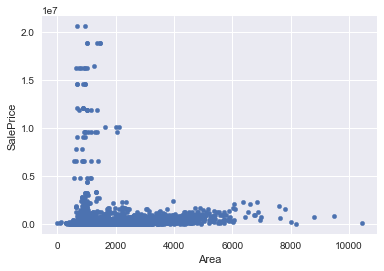

In [519]:
home_data_clean.plot.scatter(x="Area", y="SalePrice")

In [520]:
X = sm.add_constant(home_data_clean["Area"])
Y = home_data_clean["SalePrice"]
est = sm.OLS(Y, X)
res = est.fit()

In [521]:
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     265.8
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           1.83e-59
Time:                        15:56:36   Log-Likelihood:            -3.9760e+05
No. Observations:               27048   AIC:                         7.952e+05
Df Residuals:                   27046   BIC:                         7.952e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.515e+04   8949.755      6.163      0.000    3.76e+04    7.27e+04
Area          80.5790      4.943     16.302      0.000      70.891      90.267
==============================================================================
Omnibus:                    63078.099   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        441457023.388
Skew:                          23.421   Prob(JB):                         0.00
Kurtosis:                     627.112   Cond. No.                     4.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

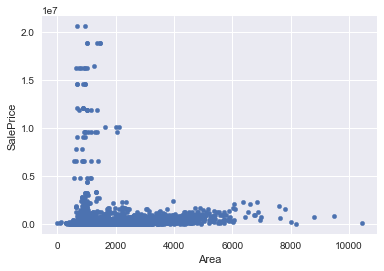

In [522]:
from statsmodels.graphics.regressionplots import abline_plot
axes = home_data_clean.plot.scatter(x="Area", y="SalePrice")

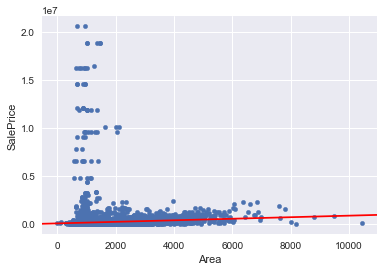

In [523]:
abline_plot(model_results=res, ax=axes, color='r')

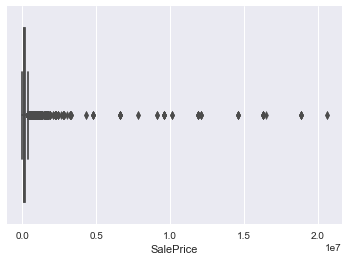

In [524]:
sns.boxplot(x="SalePrice", data=home_data_clean)

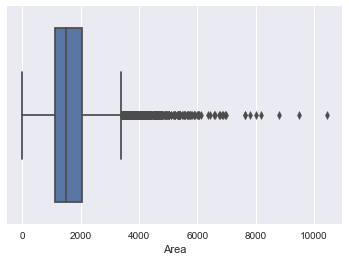

In [525]:
sns.boxplot(x="Area", data=home_data_clean)

In [526]:
def get_bounds(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [527]:
area_lower, area_upper = get_bounds(home_data_clean.Area)
sale_lower, sale_upper = get_bounds(home_data_clean.AppraisedBuilding)

home_data_clean = home_data_clean.query("SalePrice >= @sale_lower and "
                                  "SalePrice <= @sale_upper and "
                                  "Area >= @area_lower and "
                                  "Area <= @area_upper"
                                 )

In [528]:
X = sm.add_constant(home_data_clean["Area"])
Y = home_data_clean["SalePrice"]
est = sm.OLS(Y, X)
res = est.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:            -2.9751e+05
No. Observations:               24058   AIC:                         5.950e+05
Df Residuals:                   24056   BIC:                         5.950e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.169e+04   1105.483     19.618      0.000    1.95e+04    2.39e+04
Area          68.7282      0.683    100.590      0.000      67.389      70.067
==============================================================================
Omnibus:                      200.234   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.956
Skew:                          -0.046   Prob(JB):                     6.69e-69
Kurtosis:                       3.552   Cond. No.                     4.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

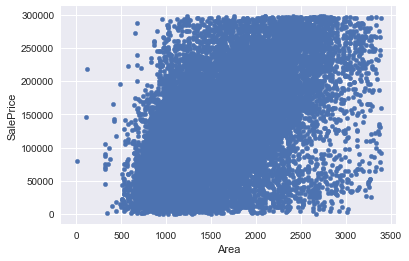

In [529]:
axes = home_data_clean.plot.scatter(x="Area", y="SalePrice")

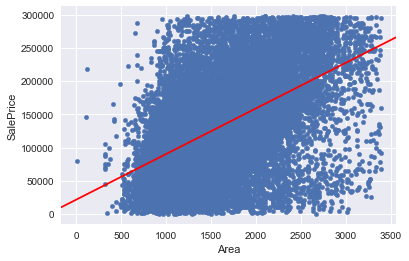

In [530]:
abline_plot(model_results=res, ax=axes, color='r')

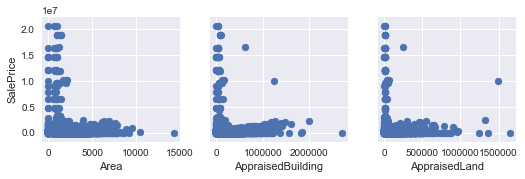

In [531]:
independent_columns = ['Area', 'AppraisedBuilding', 'AppraisedLand']
dependent_column = ['SalePrice']

g = sns.PairGrid(home_data, x_vars=independent_columns, y_vars=dependent_column)
g.map(plt.scatter);

In [532]:
home_data_clean = home_data.dropna().query(
    "Area > 0 and "
    "AppraisedBuilding > 0 and "
    "AppraisedBuilding > 0 and "
    "SalePrice > 0"
).copy()

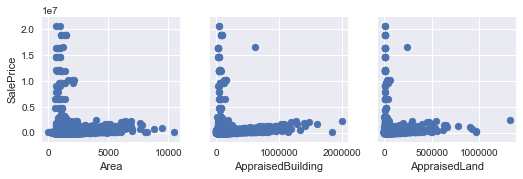

In [533]:
g = sns.PairGrid(home_data_clean, x_vars=independent_columns, y_vars=dependent_column)
g.map(plt.scatter);

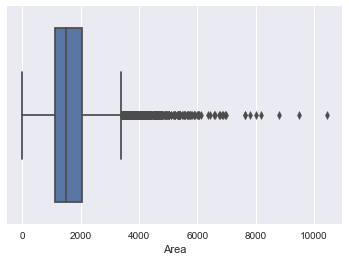

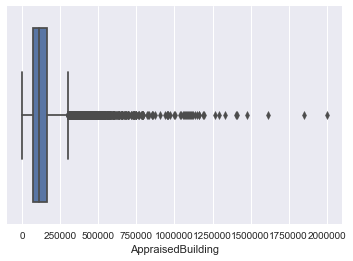

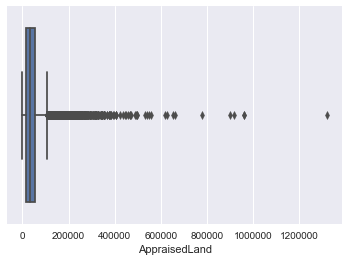

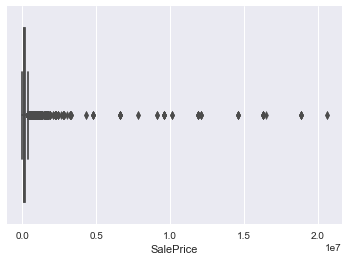

In [534]:
for column in independent_columns + dependent_column:
    sns.boxplot(x=column, data=home_data_clean)
    plt.show()

In [535]:
def iqr_clean(dataframe, columns):
    for column in columns:
        lower, upper = get_bounds(dataframe[column])
        dataframe = dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]
    return dataframe

In [536]:
columns = independent_columns + dependent_column
home_data_clean = iqr_clean(home_data_clean, columns)

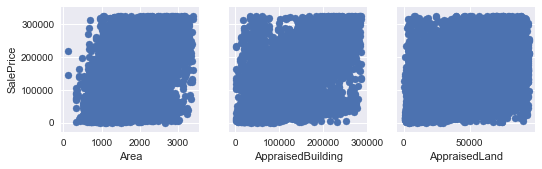

In [537]:
g = sns.PairGrid(home_data_clean, x_vars=independent_columns, y_vars=dependent_column)
g.map(plt.scatter);

In [538]:
X = sm.add_constant(home_data_clean[independent_columns])
Y = home_data_clean[dependent_column]
est = sm.OLS(Y, X)
res = est.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:56:44   Log-Likelihood:            -2.7951e+05
No. Observations:               23124   AIC:                         5.590e+05
Df Residuals:                   23120   BIC:                         5.591e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.73e+04    874.549     19.782      0.000    1.56e+04     1.9e+04
Area                  1.3077      0.810      1.615      0.106      -0.279       2.895
AppraisedBuilding     0.8732      0.010     90.505      0.000       0.854       0.892
AppraisedLand         0.4303      0.019     22.463      0.000       0.393       0.468
==============================================================================
Omnibus:                     2761.879   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24788.045
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                       8.051   Cond. No.                     3.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [539]:
#log-linear, https://en.wikipedia.org/wiki/Log-linear_model
epa_subset = pd.read_sql_table("epa_subset", con=engine)
epa_subset.shape

(37212, 16)

In [540]:
epa_subset.head()

,index,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year
0,0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Two Seaters,1985
1,1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Two Seaters,1985
2,2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Subcompact Cars,1985
3,3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Vans,1985
4,4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Compact Cars,1993


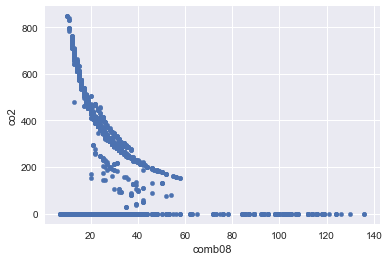

In [541]:
epa_subset.plot.scatter(x="comb08", y="co2")

In [542]:
epa_subset.query("comb08 > 0 and co2 > 0", inplace=True)

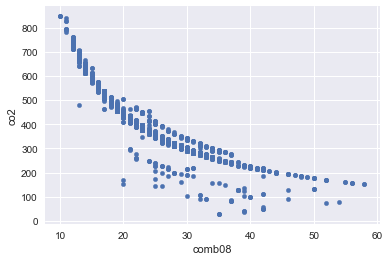

In [543]:
epa_subset.plot.scatter(x="comb08", y="co2")

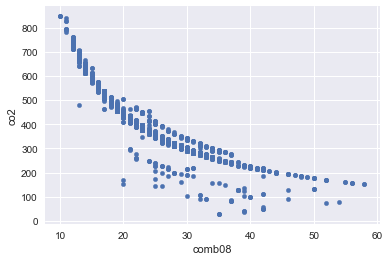

In [544]:
axes = epa_subset.plot.scatter(x="comb08", y="co2")

In [545]:
X = sm.add_constant(epa_subset["comb08"])
Y = epa_subset["co2"]
est = sm.OLS(Y, X)
res = est.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 4.568e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:56:46   Log-Likelihood:                -36735.
No. Observations:                7259   AIC:                         7.347e+04
Df Residuals:                    7257   BIC:                         7.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        787.0831      1.828    430.650      0.000     783.500     790.666
comb08       -16.4312      0.077   -213.724      0.000     -16.582     -16.281
==============================================================================
Omnibus:                     3169.263   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40432.851
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                      14.024   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

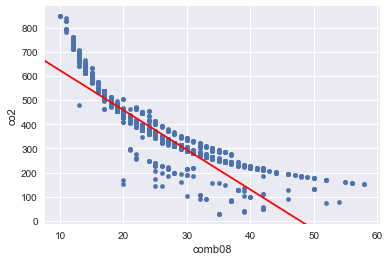

In [546]:
abline_plot(model_results=res, ax=axes, color='r')

In [547]:
epa_subset["logCo2"] = epa_subset.co2.apply(pd.np.log)

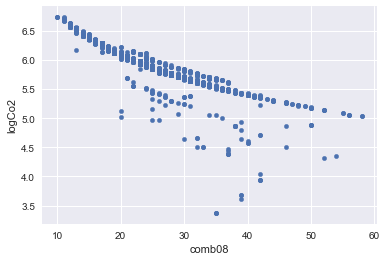

In [548]:
axes = epa_subset.plot.scatter(x="comb08", y="logCo2")

In [549]:
X = sm.add_constant(epa_subset["comb08"])
Y = epa_subset["logCo2"]
est = sm.OLS(Y, X)
res = est.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logCo2   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 4.547e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:56:49   Log-Likelihood:                 6305.0
No. Observations:                7259   AIC:                        -1.261e+04
Df Residuals:                    7257   BIC:                        -1.259e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9834      0.005   1436.032      0.000       6.974       6.993
comb08        -0.0436      0.000   -213.242      0.000      -0.044      -0.043
==============================================================================
Omnibus:                    10409.156   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5408531.948
Skew:                          -8.361   Prob(JB):                         0.00
Kurtosis:                     135.674   Cond. No.                         97.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

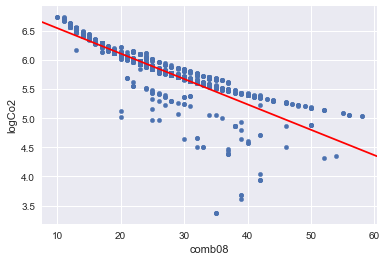

In [550]:
abline_plot(model_results=res, ax=axes, color='r')

In [551]:
res.params

const     6.983393
comb08   -0.043621
dtype: float64

In [552]:
prediction = pd.np.exp(res.params.const + res.params.comb08 * epa_subset.comb08.sort_values())

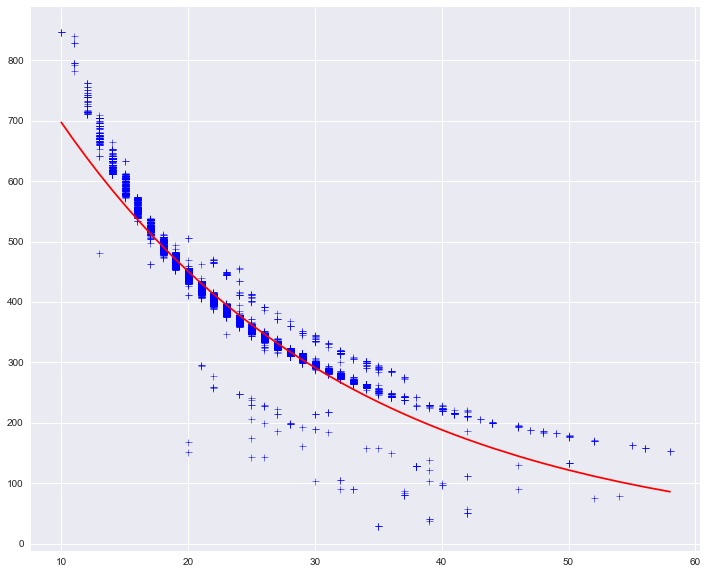

In [553]:
fig, axes = plt.subplots(figsize=(12,10))
axes.plot(epa_subset.comb08, epa_subset.co2, 'b+')
axes.plot(epa_subset.comb08.sort_values(), prediction, 'r')

In [554]:
# logistic, https://en.wikipedia.org/wiki/Logistic_regression
hours = [0.5, 0.75, 1.0, 1.25, 1.50, 1.75, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5]
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

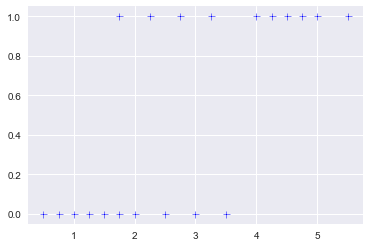

In [555]:
plt.plot(hours, passed, 'b+')

In [577]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
X = sm.add_constant(hours)
logit_model=sm.Logit(passed,X)
result=logit_model.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Mar 2018   Pseudo R-squ.:                  0.4208
Time:                        16:00:36   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
x1             1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [557]:
result.predict()

array([0.03471034, 0.04977295, 0.07089196, 0.10002862, 0.13934447,
       0.1908365 , 0.1908365 , 0.25570318, 0.33353024, 0.42162653,
       0.51501086, 0.60735865, 0.69261733, 0.76648084, 0.8744475 ,
       0.91027764, 0.93662366, 0.95561071, 0.96909707, 0.98519444])

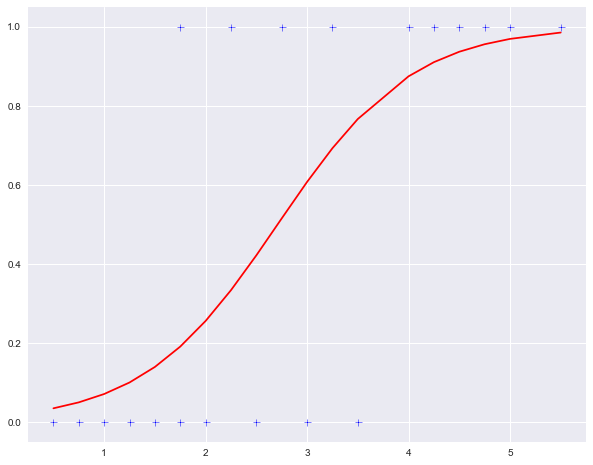

In [558]:
fig, axes = plt.subplots(figsize=(10,8))
axes.plot(hours,passed, 'b+')
axes.plot(hours, result.predict(), 'r-')


In [559]:
home_data.head()

,index,AirConditioning,AppraisedBuilding,AppraisedLand,Area,Bathrooms,Bedrooms,County,Fireplaces,Heat,Rooms,SalePrice,YearBuilt
0,0,True,59600.0,8100.0,2264.0,2.0,4.0,Franklin,0.0,True,10.0,0.0,1925.0
1,1,True,69800.0,4600.0,1835.0,1.5,4.0,Franklin,1.0,True,7.0,50000.0,1919.0
2,2,True,60600.0,4900.0,1656.0,1.0,3.0,Franklin,0.0,True,7.0,64000.0,1925.0
3,3,True,31200.0,5000.0,1000.0,1.0,2.0,Franklin,0.0,True,5.0,0.0,1922.0
4,4,True,63300.0,4600.0,1306.0,2.0,4.0,Franklin,0.0,True,6.0,0.0,1948.0


In [560]:
home_data.dropna(inplace=True)

In [561]:
home_data['HasFireplace'] = (home_data.Fireplaces > 0).astype(int)
home_data.head()

,index,AirConditioning,AppraisedBuilding,AppraisedLand,Area,Bathrooms,Bedrooms,County,Fireplaces,Heat,Rooms,SalePrice,YearBuilt,HasFireplace
0,0,True,59600.0,8100.0,2264.0,2.0,4.0,Franklin,0.0,True,10.0,0.0,1925.0,0
1,1,True,69800.0,4600.0,1835.0,1.5,4.0,Franklin,1.0,True,7.0,50000.0,1919.0,1
2,2,True,60600.0,4900.0,1656.0,1.0,3.0,Franklin,0.0,True,7.0,64000.0,1925.0,0
3,3,True,31200.0,5000.0,1000.0,1.0,2.0,Franklin,0.0,True,5.0,0.0,1922.0,0
4,4,True,63300.0,4600.0,1306.0,2.0,4.0,Franklin,0.0,True,6.0,0.0,1948.0,0


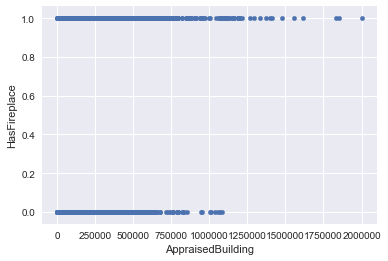

In [562]:
home_data.plot.scatter(x="AppraisedBuilding", y="HasFireplace")

In [576]:
home_data.sort_values(by=["AppraisedBuilding"], inplace=True)
X = sm.add_constant(home_data.AppraisedBuilding)
logit_model=sm.Logit(home_data.HasFireplace,X)
result=logit_model.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.626131
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HasFireplace   No. Observations:                38402
Model:                          Logit   Df Residuals:                    38400
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Mar 2018   Pseudo R-squ.:                 0.06897
Time:                        16:00:28   Log-Likelihood:                -24045.
converged:                       True   LL-Null:                       -25826.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3908      0.021    -65.190      0.000      -1.433      -1.349
AppraisedBuilding  7.911e-06   1.51e-07     52.277      0.000    7.61e-06    8.21e-06
=====================================================================================
"""

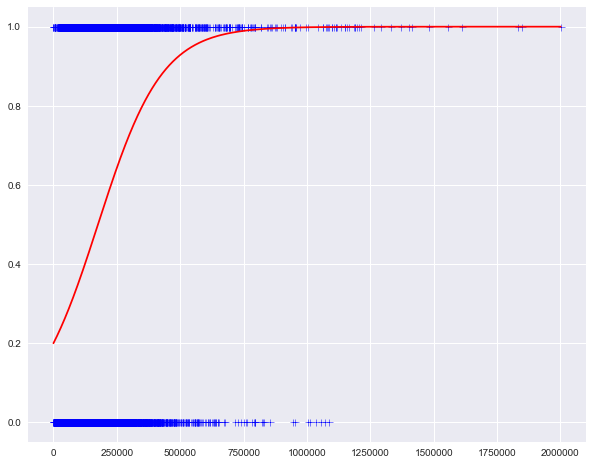

In [564]:
fig, axes = plt.subplots(figsize=(10,8))
axes.plot(home_data.AppraisedBuilding, home_data.HasFireplace, 'b+')
axes.plot(home_data.AppraisedBuilding, result.predict(), 'r-')

In [565]:
#https://www.epa.gov/regulations-emissions-vehicles-and-engines/regulations-greenhouse-gas-emissions-passenger-cars-and
epa_subset.head()

,index,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,VClass,year,logCo2
15790,16780,29,29.0,318,318.0,32,32.0,4.0,2.0,Diesel,37,37.00,Volkswagen,Jetta,Compact Cars,2009,5.762051
15791,16781,29,28.5,315,315.0,32,32.3,4.0,2.0,Diesel,39,38.54,Volkswagen,Jetta,Compact Cars,2009,5.752573
15846,16839,29,29.0,318,318.0,32,32.0,4.0,2.0,Diesel,37,37.00,Volkswagen,Jetta SportWagen,Small Station Wagons,2009,5.762051
15847,16840,29,28.5,315,315.0,32,32.3,4.0,2.0,Diesel,39,38.54,Volkswagen,Jetta SportWagen,Small Station Wagons,2009,5.752573
19673,21337,29,28.5,315,315.0,32,32.3,4.0,2.0,Diesel,39,38.54,Volkswagen,Golf,Compact Cars,2010,5.752573


In [566]:
epa_subset['meetsRequirement'] = (epa_subset.co2 <= 163).astype(int)

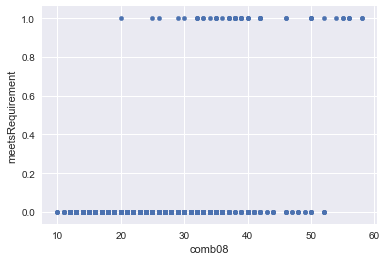

In [571]:
epa_subset.plot.scatter(x="comb08", y="meetsRequirement")

In [575]:
epa_subset.sort_values(by=["comb08"], inplace=True)
X = sm.add_constant(epa_subset.comb08)
logit_model=sm.Logit(epa_subset.meetsRequirement,X)
result=logit_model.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.027135
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       meetsRequirement   No. Observations:                 7259
Model:                          Logit   Df Residuals:                     7257
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Mar 2018   Pseudo R-squ.:                  0.4252
Time:                        16:00:23   Log-Likelihood:                -196.98
converged:                       True   LL-Null:                       -342.69
                                        LLR p-value:                 2.416e-65
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4400      0.645    -19.275      0.000     -13.705     -11.175
comb08         0.2575      0.017     14.866      0.000       0.224       0.291
==============================================================================
"""

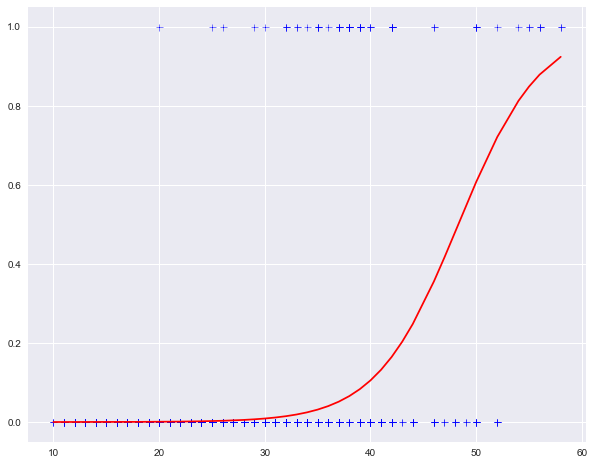

In [573]:
fig, axes = plt.subplots(figsize=(10,8))
axes.plot(epa_subset.comb08, epa_subset.meetsRequirement, 'b+')
axes.plot(epa_subset.comb08, result.predict(), 'r-')

Optimization terminated successfully.
         Current function value: 0.037906
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       meetsRequirement   No. Observations:                 7259
Model:                          Logit   Df Residuals:                     7257
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Mar 2018   Pseudo R-squ.:                  0.1971
Time:                        16:00:14   Log-Likelihood:                -275.16
converged:                       True   LL-Null:                       -342.69
                                        LLR p-value:                 3.186e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5998      0.542      1.108      0.268      -0.462       1.661
displ         -2.5274      0.309     -8.168      0.000      -3.134      -1.921
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

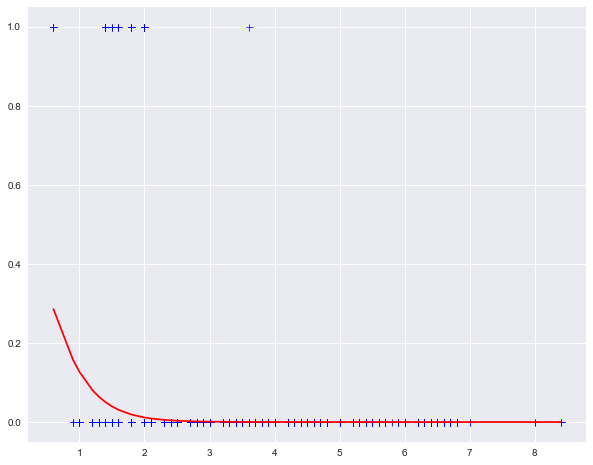

In [574]:
epa_subset.sort_values(by=["displ"], inplace=True)
X = sm.add_constant(epa_subset.displ)
logit_model=sm.Logit(epa_subset.meetsRequirement,X)
result=logit_model.fit()
display(result.summary())
fig, axes = plt.subplots(figsize=(10,8))
axes.plot(epa_subset.displ, epa_subset.meetsRequirement, 'b+')
axes.plot(epa_subset.displ, result.predict(), 'r-')